In [1]:
import polars as pl
from glob import glob

In [5]:
ROOT = "home-credit-credit-risk-model-stability"
TRAIN_DIR = ROOT+"/parquet_files/train"
TEST_DIR = ROOT+"/parquet_files/test"


In [47]:
df = pl.read_parquet(TRAIN_DIR+"/train_credit_bureau_a_1_0.parquet")

In [48]:
df

case_id,annualeffectiverate_199L,annualeffectiverate_63L,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,contractsum_5085717L,credlmt_230A,credlmt_935A,dateofcredend_289D,dateofcredend_353D,dateofcredstart_181D,dateofcredstart_739D,dateofrealrepmt_138D,debtoutstand_525A,debtoverdue_47A,description_351M,dpdmax_139P,dpdmax_757P,dpdmaxdatemonth_442T,dpdmaxdatemonth_89T,dpdmaxdateyear_596T,dpdmaxdateyear_896T,financialinstitution_382M,financialinstitution_591M,instlamount_768A,instlamount_852A,interestrate_508L,lastupdate_1112D,lastupdate_388D,monthlyinstlamount_332A,monthlyinstlamount_674A,nominalrate_281L,nominalrate_498L,num_group1,numberofcontrsvalue_258L,…,numberofoverdueinstlmax_1039L,numberofoverdueinstlmax_1151L,numberofoverdueinstlmaxdat_148D,numberofoverdueinstlmaxdat_641D,numberofoverdueinstls_725L,numberofoverdueinstls_834L,outstandingamount_354A,outstandingamount_362A,overdueamount_31A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,overdueamountmaxdateyear_994T,periodicityofpmts_1102L,periodicityofpmts_837L,prolongationcount_1120L,prolongationcount_599L,purposeofcred_426M,purposeofcred_874M,refreshdate_3813885D,residualamount_488A,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_6A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A
i64,f64,f64,str,str,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str,str,f64,f64,f64,f64,i64,f64,…,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,f64,f64,str,str,f64,f64,f64,f64,f64,f64
388,null,null,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",null,null,135806.0,"""2020-08-06""",null,null,"""2018-08-06""",null,null,null,"""a55475b1""",0.0,null,null,8.0,2018.0,null,"""a55475b1""","""P204_66_73""",8742.8,null,null,"""2019-01-11""",null,8742.8,null,null,null,1,null,…,0.0,null,null,null,0.0,null,null,null,null,0.0,0.0,null,null,null,0.0,null,null,8.0,2018.0,null,null,null,null,null,"""60c73645""","""a55475b1""",null,null,114325.805,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""4408ff0f""","""a55475b1""","""7241344e""","""a55475b1""",null,null,null,"""2023-06-20""",null,null,"""2018-06-20""",null,374419.5,0.0,"""a55475b1""",0.0,null,null,7.0,2018.0,null,"""a55475b1""","""55b002a9""",null,null,null,"""2019-01-24""",null,7811.4463,null,null,null,0,2.0,…,0.0,null,null,null,0.0,null,null,260093.7,null,0.0,0.0,null,null,null,0.0,null,null,7.0,2018.0,null,null,30.0,null,null,"""96a8fdfe""","""a55475b1""",null,null,null,"""ab3c25cf""","""ab3c25cf""",null,268897.62,0.0,0.0,374419.5,0.0
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,2,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""2019-01-28""",null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,3,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""","""2019-01-28""",null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",

In [49]:
for col in df.columns:
            if col in ["case_id", "WEEK_NUM", "num_group1", "num_group2"]:
                df = df.with_columns(pl.col(col).cast(pl.Int32))
            elif col in ["date_decision"]:
                df = df.with_columns(pl.col(col).cast(pl.Date))
            # P : Transform DPD (Days past due)
            # A : Transform amount
            elif col[-1] in ("P", "A"):
                df = df.with_columns(pl.col(col).cast(pl.Float64))
            # M : Masking categories
            elif col[-1] in ("M",):
                df = df.with_columns(pl.col(col).cast(pl.String))
            # D : Transform date
            elif col[-1] in ("D",):
                df = df.with_columns(pl.col(col).cast(pl.Date))    

In [50]:
df['case_id'].unique().count()

335275

In [51]:
df

case_id,annualeffectiverate_199L,annualeffectiverate_63L,classificationofcontr_13M,classificationofcontr_400M,contractst_545M,contractst_964M,contractsum_5085717L,credlmt_230A,credlmt_935A,dateofcredend_289D,dateofcredend_353D,dateofcredstart_181D,dateofcredstart_739D,dateofrealrepmt_138D,debtoutstand_525A,debtoverdue_47A,description_351M,dpdmax_139P,dpdmax_757P,dpdmaxdatemonth_442T,dpdmaxdatemonth_89T,dpdmaxdateyear_596T,dpdmaxdateyear_896T,financialinstitution_382M,financialinstitution_591M,instlamount_768A,instlamount_852A,interestrate_508L,lastupdate_1112D,lastupdate_388D,monthlyinstlamount_332A,monthlyinstlamount_674A,nominalrate_281L,nominalrate_498L,num_group1,numberofcontrsvalue_258L,…,numberofoverdueinstlmax_1039L,numberofoverdueinstlmax_1151L,numberofoverdueinstlmaxdat_148D,numberofoverdueinstlmaxdat_641D,numberofoverdueinstls_725L,numberofoverdueinstls_834L,outstandingamount_354A,outstandingamount_362A,overdueamount_31A,overdueamount_659A,overdueamountmax2_14A,overdueamountmax2_398A,overdueamountmax2date_1002D,overdueamountmax2date_1142D,overdueamountmax_155A,overdueamountmax_35A,overdueamountmaxdatemonth_284T,overdueamountmaxdatemonth_365T,overdueamountmaxdateyear_2T,overdueamountmaxdateyear_994T,periodicityofpmts_1102L,periodicityofpmts_837L,prolongationcount_1120L,prolongationcount_599L,purposeofcred_426M,purposeofcred_874M,refreshdate_3813885D,residualamount_488A,residualamount_856A,subjectrole_182M,subjectrole_93M,totalamount_6A,totalamount_996A,totaldebtoverduevalue_178A,totaldebtoverduevalue_718A,totaloutstanddebtvalue_39A,totaloutstanddebtvalue_668A
i32,f64,f64,str,str,str,str,f64,f64,f64,date,date,date,date,date,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,date,date,f64,f64,f64,f64,i32,f64,…,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,date,f64,f64,str,str,f64,f64,f64,f64,f64,f64
388,null,null,"""ea6782cc""","""a55475b1""","""7241344e""","""a55475b1""",null,null,135806.0,2020-08-06,null,null,2018-08-06,null,null,null,"""a55475b1""",0.0,null,null,8.0,2018.0,null,"""a55475b1""","""P204_66_73""",8742.8,null,null,2019-01-11,null,8742.8,null,null,null,1,null,…,0.0,null,null,null,0.0,null,null,null,null,0.0,0.0,null,null,null,0.0,null,null,8.0,2018.0,null,null,null,null,null,"""60c73645""","""a55475b1""",null,null,114325.805,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""4408ff0f""","""a55475b1""","""7241344e""","""a55475b1""",null,null,null,2023-06-20,null,null,2018-06-20,null,374419.5,0.0,"""a55475b1""",0.0,null,null,7.0,2018.0,null,"""a55475b1""","""55b002a9""",null,null,null,2019-01-24,null,7811.4463,null,null,null,0,2.0,…,0.0,null,null,null,0.0,null,null,260093.7,null,0.0,0.0,null,null,null,0.0,null,null,7.0,2018.0,null,null,30.0,null,null,"""96a8fdfe""","""a55475b1""",null,null,null,"""ab3c25cf""","""ab3c25cf""",null,268897.62,0.0,0.0,374419.5,0.0
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,2,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",2019-01-28,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,null,"""a55475b1""",null,null,null,null,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,null,null,3,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""a55475b1""","""a55475b1""",2019-01-28,null,null,"""a55475b1""","""a55475b1""",null,null,null,null,null,null
388,null,null,"""a55475b1""","""a55475b1""","""a55475b1""","""a55475b1""",null,null,null,null,null,null,null,n

In [52]:
num_cols = [col for col in df.columns if col[-1] in ("P", "A")]

num_expr_max = [pl.max(col).alias(f"max_{col}") for col in num_cols]

date_cols = [col for col in df.columns if col[-1] in ("D",)]

date_expr_max = [pl.max(col).alias(f"max_{col}") for col in date_cols]

expr = num_expr_max +\
date_expr_max

In [53]:
num_cols

['credlmt_230A',
 'credlmt_935A',
 'debtoutstand_525A',
 'debtoverdue_47A',
 'dpdmax_139P',
 'dpdmax_757P',
 'instlamount_768A',
 'instlamount_852A',
 'monthlyinstlamount_332A',
 'monthlyinstlamount_674A',
 'outstandingamount_354A',
 'outstandingamount_362A',
 'overdueamount_31A',
 'overdueamount_659A',
 'overdueamountmax2_14A',
 'overdueamountmax2_398A',
 'overdueamountmax_155A',
 'overdueamountmax_35A',
 'residualamount_488A',
 'residualamount_856A',
 'totalamount_6A',
 'totalamount_996A',
 'totaldebtoverduevalue_178A',
 'totaldebtoverduevalue_718A',
 'totaloutstanddebtvalue_39A',
 'totaloutstanddebtvalue_668A']

In [54]:
date_cols

['dateofcredend_289D',
 'dateofcredend_353D',
 'dateofcredstart_181D',
 'dateofcredstart_739D',
 'dateofrealrepmt_138D',
 'lastupdate_1112D',
 'lastupdate_388D',
 'numberofoverdueinstlmaxdat_148D',
 'numberofoverdueinstlmaxdat_641D',
 'overdueamountmax2date_1002D',
 'overdueamountmax2date_1142D',
 'refreshdate_3813885D']

In [55]:
num_expr_max

[<Expr ['col("credlmt_230A").max().alia…'] at 0x2E4ED0580>,
 <Expr ['col("credlmt_935A").max().alia…'] at 0x2E4ED0CA0>,
 <Expr ['col("debtoutstand_525A").max()…'] at 0x2E4ED0160>,
 <Expr ['col("debtoverdue_47A").max().a…'] at 0x2E4ED05B0>,
 <Expr ['col("dpdmax_139P").max().alias…'] at 0x2E4ED0880>,
 <Expr ['col("dpdmax_757P").max().alias…'] at 0x2E4ED0B20>,
 <Expr ['col("instlamount_768A").max().…'] at 0x2E4ED0A30>,
 <Expr ['col("instlamount_852A").max().…'] at 0x2E4EDC9D0>,
 <Expr ['col("monthlyinstlamount_332A")…'] at 0x2E4EDC430>,
 <Expr ['col("monthlyinstlamount_674A")…'] at 0x2E4EDC3D0>,
 <Expr ['col("outstandingamount_354A").…'] at 0x2E4EDCB80>,
 <Expr ['col("outstandingamount_362A").…'] at 0x2E4EDC490>,
 <Expr ['col("overdueamount_31A").max()…'] at 0x2E4EDCD00>,
 <Expr ['col("overdueamount_659A").max(…'] at 0x2E4EDC790>,
 <Expr ['col("overdueamountmax2_14A").m…'] at 0x2E4EDC700>,
 <Expr ['col("overdueamountmax2_398A").…'] at 0x2E4EDC520>,
 <Expr ['col("overdueamountmax_155A").m…

In [56]:
expr

[<Expr ['col("credlmt_230A").max().alia…'] at 0x2E4ED0580>,
 <Expr ['col("credlmt_935A").max().alia…'] at 0x2E4ED0CA0>,
 <Expr ['col("debtoutstand_525A").max()…'] at 0x2E4ED0160>,
 <Expr ['col("debtoverdue_47A").max().a…'] at 0x2E4ED05B0>,
 <Expr ['col("dpdmax_139P").max().alias…'] at 0x2E4ED0880>,
 <Expr ['col("dpdmax_757P").max().alias…'] at 0x2E4ED0B20>,
 <Expr ['col("instlamount_768A").max().…'] at 0x2E4ED0A30>,
 <Expr ['col("instlamount_852A").max().…'] at 0x2E4EDC9D0>,
 <Expr ['col("monthlyinstlamount_332A")…'] at 0x2E4EDC430>,
 <Expr ['col("monthlyinstlamount_674A")…'] at 0x2E4EDC3D0>,
 <Expr ['col("outstandingamount_354A").…'] at 0x2E4EDCB80>,
 <Expr ['col("outstandingamount_362A").…'] at 0x2E4EDC490>,
 <Expr ['col("overdueamount_31A").max()…'] at 0x2E4EDCD00>,
 <Expr ['col("overdueamount_659A").max(…'] at 0x2E4EDC790>,
 <Expr ['col("overdueamountmax2_14A").m…'] at 0x2E4EDC700>,
 <Expr ['col("overdueamountmax2_398A").…'] at 0x2E4EDC520>,
 <Expr ['col("overdueamountmax_155A").m…

In [57]:
df = df.group_by("case_id").agg(expr)

In [58]:
df

case_id,max_credlmt_230A,max_credlmt_935A,max_debtoutstand_525A,max_debtoverdue_47A,max_dpdmax_139P,max_dpdmax_757P,max_instlamount_768A,max_instlamount_852A,max_monthlyinstlamount_332A,max_monthlyinstlamount_674A,max_outstandingamount_354A,max_outstandingamount_362A,max_overdueamount_31A,max_overdueamount_659A,max_overdueamountmax2_14A,max_overdueamountmax2_398A,max_overdueamountmax_155A,max_overdueamountmax_35A,max_residualamount_488A,max_residualamount_856A,max_totalamount_6A,max_totalamount_996A,max_totaldebtoverduevalue_178A,max_totaldebtoverduevalue_718A,max_totaloutstanddebtvalue_39A,max_totaloutstanddebtvalue_668A,max_dateofcredend_289D,max_dateofcredend_353D,max_dateofcredstart_181D,max_dateofcredstart_739D,max_dateofrealrepmt_138D,max_lastupdate_1112D,max_lastupdate_388D,max_numberofoverdueinstlmaxdat_148D,max_numberofoverdueinstlmaxdat_641D,max_overdueamountmax2date_1002D,max_overdueamountmax2date_1142D,max_refreshdate_3813885D
i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,date,date,date,date,date,date,date,date,date,date,date,date
2554131,48000.0,null,998051.2,0.0,6.0,55.0,null,1015.63605,17450.8,1015.63605,0.0,968459.2,0.0,0.0,17330.541,8330.561,17330.541,8330.561,0.0,null,14952.2,1e6,0.0,0.0,968459.2,0.0,2028-02-20,2018-12-06,2014-12-06,2018-08-26,2018-04-08,2019-03-26,2018-04-17,2016-06-07,2019-02-04,2016-06-07,2018-11-29,2019-04-03
650844,97559.6,null,19350.113,0.0,0.0,635.0,null,1756.0721,2784.0,15463.362,0.0,19350.113,0.0,0.0,0.0,97559.47,0.0,97559.47,0.0,null,17178.201,25007.6,0.0,0.0,19350.113,0.0,2019-11-15,2019-08-09,2019-02-10,2018-12-15,2019-03-21,2019-03-26,2019-03-21,2018-03-31,null,2016-04-30,null,2019-03-30
2572971,null,null,53731.934,0.0,0.0,null,null,null,3116.6,null,null,38860.062,null,0.0,0.0,null,0.0,null,null,null,null,50000.0,0.0,0.0,53731.934,0.0,2020-08-10,null,null,2018-11-23,null,2019-05-07,null,null,null,null,null,2019-05-29
666561,null,null,213849.23,0.0,0.0,null,null,null,8656.512,null,null,211562.23,null,0.0,0.0,null,0.0,null,null,null,null,300000.0,0.0,0.0,213849.23,0.0,2021-09-25,null,null,2018-04-19,null,2019-04-10,null,null,null,null,null,2019-04-21
1394064,56000.0,null,429236.0,0.0,0.0,1489.0,null,1000.0,23949.0,2666.2,0.0,373800.0,0.0,0.0,0.0,75424.28,0.0,68724.28,0.0,null,7998.0,373800.0,0.0,0.0,429236.0,0.0,2022-06-29,2019-11-29,2018-06-06,2019-06-04,2018-09-09,2019-06-12,2018-09-09,2018-01-23,null,2015-09-22,null,2019-06-22
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1314862,24000.0,0.0,49383.52,0.0,5.0,1564.0,0.0,0.0,6546.6,13267.2,0.0,43002.953,0.0,0.0,7682.8296,18665.8,2000.0,10650.8,0.0,0.0,24386.8,42880.0,0.0,0.0,49383.52,0.0,2020-11-22,2014-05-15,2013-05-13,2019-03-11,2018-10-24,2019-03-26,2018-10-24,2018-09-17,2015-04-14,2013-12-26,2013-10-13,2019-04-01
671354,null,0.0,0.0,0.0,0.0,null,0.0,null,0.0,null,null,null,null,0.0,3517.002,null,0.0,null,null,0.0,null,null,0.0,null,0.0,null,2020-04-03,null,null,2012-04-03,null,2019-04-23,null,null,null,null,2013-01-05,2019-04-27
131191,null,null,370788.78,0.0,9.0,null,null,null,14456.0,null,null,134319.61,null,0.0,2899.4001,null,2899.4001,null,null,null,null,200000.0,0.0,0.0,236469.17,0.0,2021-12-11,null,null,2018-12-11,null,2019-05-29,null,null,2018-10-18,null,2019-05-16,2019-06-08


In [66]:
x = {
    'weeknum': [1, 1, 1,1,1,2,2,2,2],
    'target': [0, 0, 1,0,0,0,1,1,0],
    'col3': [7, 8, 9] }


<Axes: xlabel='weeknum', ylabel='target'>

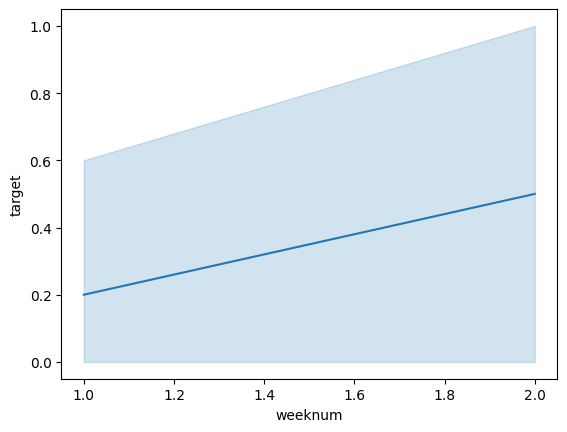

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(
    data = x,
    x = 'weeknum',
    y = 'target'
)
